<h1>Aggloramative</h1>

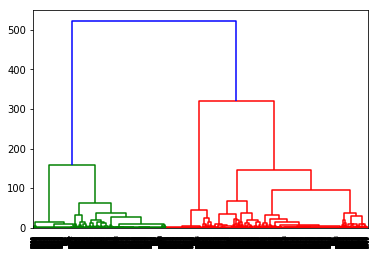

In [24]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hier
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

student_data = pd.read_csv("../../Datasets/turkiye-student-evaluation_generic.csv")
df = student_data.iloc[:,5:33]

# Transformation of data through PCA
pca = PCA(n_components = 2, random_state=1)
df_pca = pca.fit_transform(df)

dendrogram = hier.dendrogram(hier.linkage(df_pca, method = 'ward'))

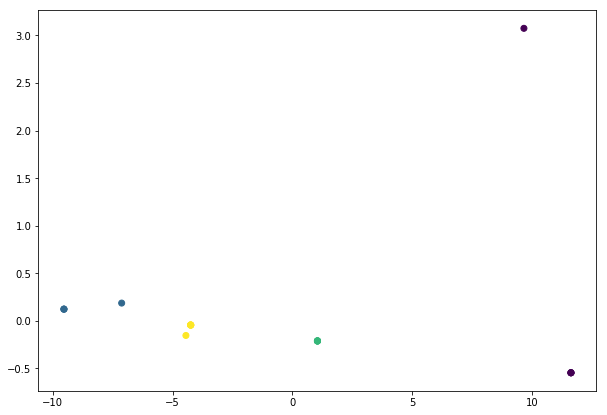

In [23]:
agl_cluster = AgglomerativeClustering(n_clusters=len(dendrogram['icoord'][0]), affinity='euclidean', linkage='ward')  
agl_cluster.fit_predict(df_pca)

plt.figure(figsize=(10, 7))  
plt.scatter(df_pca[:,0], df_pca[:,1], c=agl_cluster.labels_)